In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [203]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### EDA

In [205]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [206]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [209]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [210]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [211]:
train['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

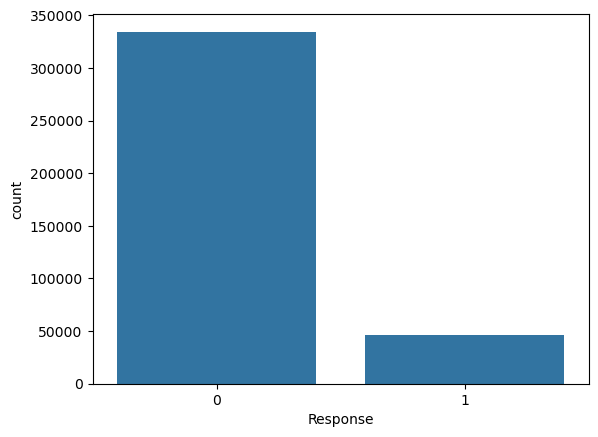

In [212]:
count_plot = sns.countplot( x = 'Response', data = train)

In [213]:
train['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [214]:
#train.replace({'Vehicle_Age': {'< 1 Year':1,'1-2 Year':2, '> 2 Years':3 }}, inplace= True)

In [215]:
train['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [216]:
X = train.drop(columns = ['id','Response'])
X[:4]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203


In [217]:
y = train['Response']
y[:4]

0    1
1    0
2    1
3    0
Name: Response, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [219]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=2)

In [220]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [221]:
categorical_features = ['Gender', 'Vehicle_Damage','Vehicle_Age']
numerical_features = ['Age','Driving_License','Region_Code','Previously_Insured',
                      'Annual_Premium','Policy_Sales_Channel','Vintage']

In [222]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
               ('onehotencoding', OneHotEncoder())])

In [223]:
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
               ('scaling', StandardScaler())])

In [224]:
preprocessor = ColumnTransformer(transformers=[
    ('categorical_transformer', categorical_transformer , categorical_features),
    ('numerical_transformer', numerical_transformer, numerical_features)
])

In [225]:
model_pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Logistic_regression_model', LogisticRegression())
])

In [226]:
model_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoding',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Vehicle_Damage',
                                                   'Vehicle_Age']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('Logistic_regression_model', LogisticRegression())])

In [227]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoding',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Vehicle_Damage',
                                                   'Vehicle_Age']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('Logistic_regression_model', LogisticRegression())])

In [228]:
X_train.shape

(266776, 10)

In [229]:
train_pred = model_pipeline.predict(X_train)

In [230]:
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [231]:
y_train

275905    0
195653    0
293289    0
6065      0
18646     0
         ..
84434     0
95816     0
203245    0
100879    0
351400    0
Name: Response, Length: 266776, dtype: int64

In [232]:
model_pipeline.predict_proba(X_train)

array([[6.69540354e-01, 3.30459646e-01],
       [9.99488845e-01, 5.11154940e-04],
       [9.98878809e-01, 1.12119093e-03],
       ...,
       [8.00775925e-01, 1.99224075e-01],
       [9.99319464e-01, 6.80536255e-04],
       [9.99103032e-01, 8.96968335e-04]])

In [233]:
val_pred = model_pipeline.predict(X_val)

In [234]:
confusion_matrix(y_train, train_pred)

array([[233864,     12],
       [ 32896,      4]])

In [235]:
confusion_matrix(y_val, val_pred)

array([[100518,      5],
       [ 13807,      3]])

In [236]:
accuracy_score(y_train, train_pred)

0.8766455753141212

In [237]:
accuracy_score(y_val, val_pred)

0.8791949830757524

In [238]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    233876
           1       0.25      0.00      0.00     32900

    accuracy                           0.88    266776
   macro avg       0.56      0.50      0.47    266776
weighted avg       0.80      0.88      0.82    266776



#### polynomial features

In [240]:
polynomial_pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor), 
    ('polynomial', PolynomialFeatures(degree=2)),
    ('Logistic_regression_model', LogisticRegression())
])

In [241]:
polynomial_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoding',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Vehicle_Damage',
                                                   'Vehicle_Age']),
                                                 ('numerical_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Driving_License',
                                                   'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('polynomial', PolynomialFeatures()),
                ('Logistic_regression_model', LogisticRegression())])

In [242]:
train_pred_poly = polynomial_pipeline.predict(X_train)
val_pred_poly = polynomial_pipeline.predict(X_val)

In [243]:
accuracy_score(y_train, train_pred_poly)

0.8767130476504633

In [244]:
accuracy_score(y_val, val_pred_poly)

0.8793874034618177

In [245]:
confusion_matrix(y_train, train_pred_poly)

array([[233695,    181],
       [ 32709,    191]])

In [246]:
confusion_matrix(y_val, val_pred_poly)

array([[100454,     69],
       [ 13721,     89]])

#### Actual Test Prediction

In [248]:
test[:4]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187


In [249]:
#test.replace({'Vehicle_Age': {'< 1 Year':1,'1-2 Year':2, '> 2 Years':3 }}, inplace= True)

In [250]:
polynomial_pipeline.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [251]:
import joblib

In [252]:
joblib.dump(model_pipeline,'car_insurance_predict_model.pkl')

['car_insurance_predict_model.pkl']